
*NAME* : KARTIK DAS

*DEPARTMENT* : INFORMATION TECHNOLOGY

*ROLL NUMBER* : GCECTB-R21-2014



# 1. IMPORT KAGGLE DATASET

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
 99% 218M/219M [00:05<00:00, 48.7MB/s]
100% 219M/219M [00:05<00:00, 41.9MB/s]


In [ ]:
!pip install tensorflow

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/rice-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# 2. IMPORT PYTHON MODULES

In [ ]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset_path = '/content/Rice_Image_Dataset'

images = []
labels = []

for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        labels.append(subfolder)

df = pd.DataFrame({'image': images, 'label': labels})

In [ ]:
df

,image,label
0,/content/Rice_Image_Dataset/Jasmine/Jasmine (3...,Jasmine
1,/content/Rice_Image_Dataset/Jasmine/Jasmine (1...,Jasmine
2,/content/Rice_Image_Dataset/Jasmine/Jasmine (2...,Jasmine
3,/content/Rice_Image_Dataset/Jasmine/Jasmine (1...,Jasmine
4,/content/Rice_Image_Dataset/Jasmine/Jasmine (9...,Jasmine
...,...,...
74995,/content/Rice_Image_Dataset/Karacadag/Karacada...,Karacadag
74996,/content/Rice_Image_Dataset/Karacadag/Karacada...,Karacadag
74997,/content/Rice_Image_Dataset/Karacadag/Karacada...,Karacadag
74998,/content/Rice_Image_Dataset/Karacadag/Karacada...,Karacadag


# 3. SHOWING NUMBER OF SAMPLES OF EACH RICE VARIENT

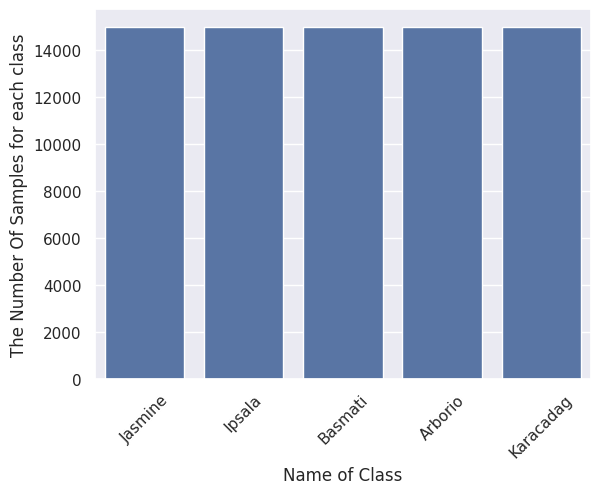

In [ ]:
ax = sns.countplot(x=df.label)# plot the classes

ax.set_xlabel("Name of Class")# Set labels and titles
ax.set_ylabel("The Number Of Samples for each class")

plt.xticks(rotation=45)# Rotate x-axis labels if needed

plt.show()# Display the plot

#4. SUBPLOTTING THE DATA & ANALYSIS THE 'GRAIN'

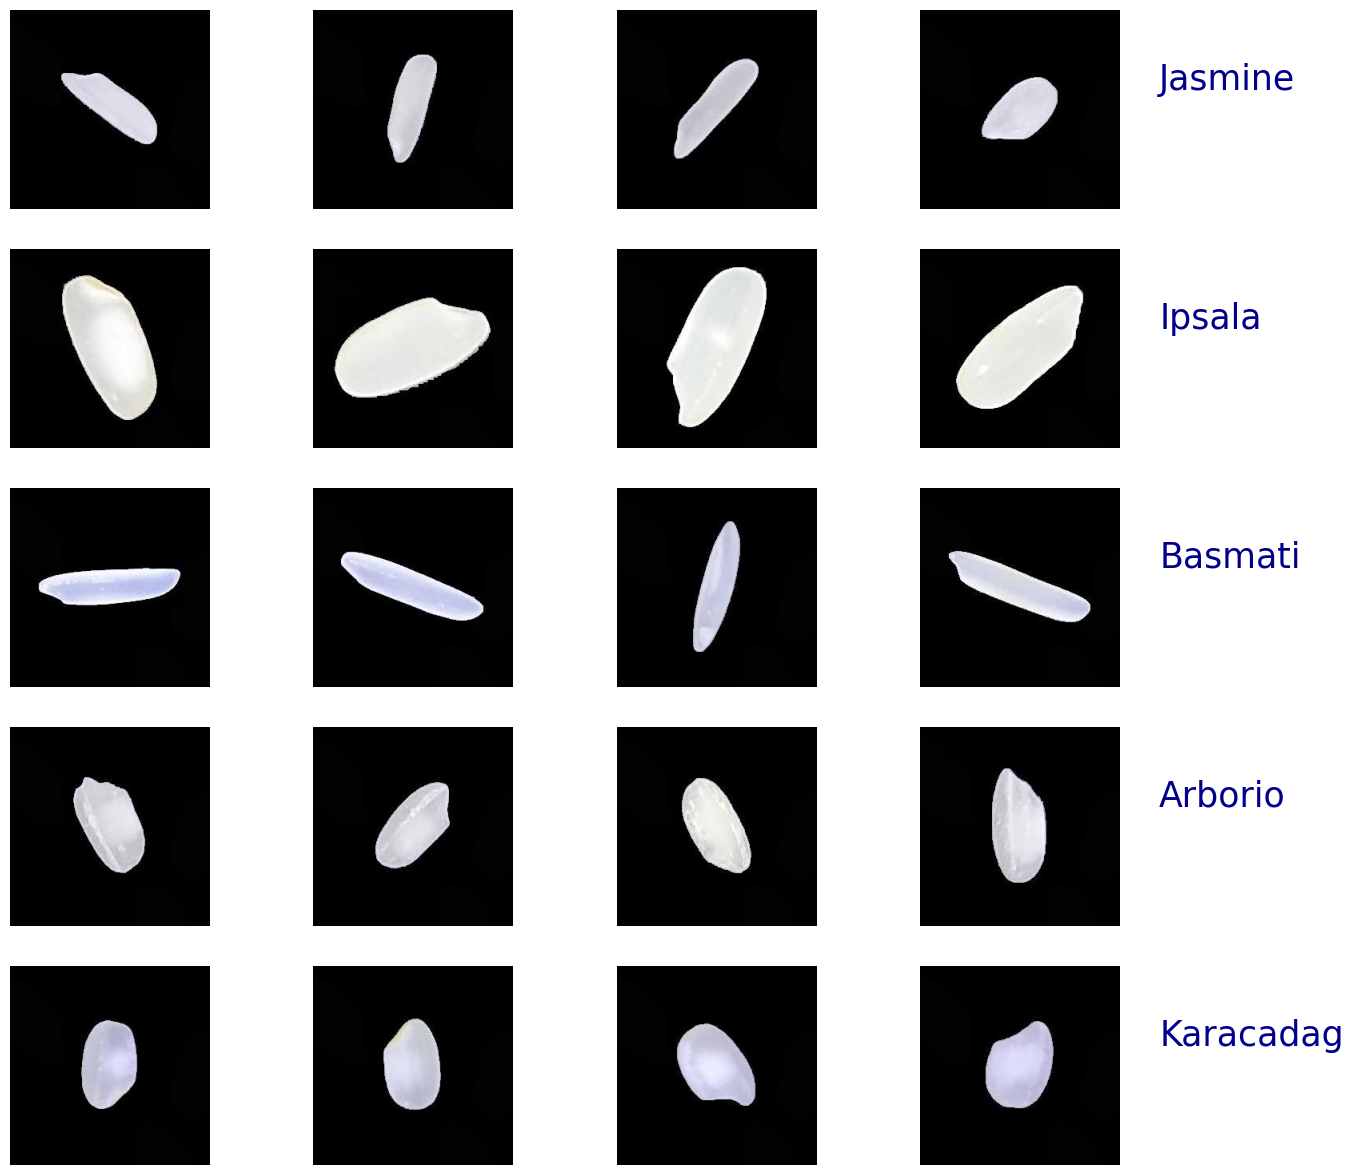

In [ ]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(15, 15))# Create figure and grid of subplots
gs = GridSpec(5, 4, figure=fig)

for i, category in enumerate(df['label'].unique()):# Loop through each unique category in the DataFrame
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]

    for j, filepath in enumerate(filepaths):    # Loop through the filepaths and add an image to each subplot
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    ax.text(300, 100, category, fontsize=25, color='darkblue')    # Add a label to the bottom of the subplot grid
plt.show()

# 5. TESTING AND TRAINING STARTS FROM HERE

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

df_train = pd.DataFrame({'image': X_train, 'label': y_train})# Create a dataframe for the training data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})# Create a dataframe for the test data

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# 6. CREATE IMAGE GENERATOR, TRAINING AND TESTING GENERATOR

In [ ]:
# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=45,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

In [ ]:
# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
  df_train,
  x_col='image',
  y_col='label',
  target_size=image_size,
  batch_size=batch_size,
  class_mode='categorical',
  shuffle=True
)

Found 60000 validated image filenames belonging to 5 classes.


In [ ]:
# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
  df_test,
  x_col='image',
  y_col='label',
  target_size=image_size,
  batch_size=batch_size,
  class_mode='categorical',
  shuffle=False
)

Found 15000 validated image filenames belonging to 5 classes.


# 7. IMPORTING KERAS MODELS & START CNN

In [ ]:
#Training Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
input_shape = (50, 50, 3)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(5, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 8.TRAIN THE MODEL ON THE TRAINING DATA


In [ ]:
history = model.fit(train_generator,epochs=5,validation_data=test_generator)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 482s 256ms/step - accuracy: 0.7354 - loss: 0.6261 - val_accuracy: 0.8953 - val_loss: 0.2773
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 412s 208ms/step - accuracy: 0.9390 - loss: 0.1656 - val_accuracy: 0.9619 - val_loss: 0.1045
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 371s 197ms/step - accuracy: 0.9573 - loss: 0.1170 - val_accuracy: 0.9753 - val_loss: 0.0717
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 370s 191ms/step - accuracy: 0.9631 - loss: 0.0992 - val_accuracy: 0.9813 - val_loss: 0.0578
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 364s 194ms/step - accuracy: 0.9736 - loss: 0.0738 - val_accuracy: 0.9762 - val_loss: 0.0704


#9.ACCURACY BETWEEN VALIDATION AND TRAIN DATA SET

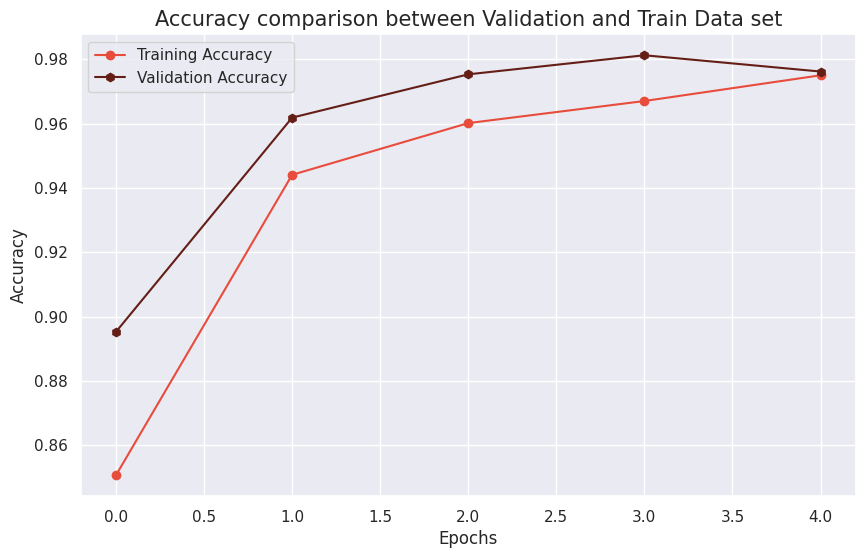

In [ ]:
history_dict = history.history

plt.figure(figsize=(10,6))
plt.plot(history_dict['accuracy'], color="#E74C3C", marker='o', label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], color='#641E16', marker='h', label='Validation Accuracy')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#10. ACCURACY BETWEEN VALIDATION AND TRAIN DATA SET

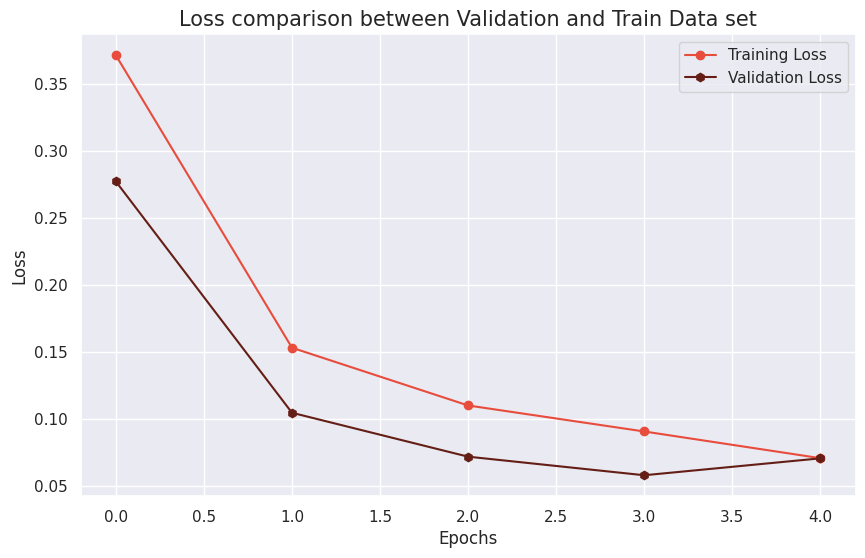

In [ ]:
history_dict = history.history

plt.figure(figsize=(10,6))
plt.plot(history_dict['loss'], color="#E74C3C", marker='o', label='Training Loss')
plt.plot(history_dict['val_loss'], color='#641E16', marker='h', label='Validation Loss')
plt.title('Loss comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 11. ACCURACY CALCULATING

In [ ]:
metrics = model.evaluate(test_generator)
print('Accuracy:', metrics[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 101ms/step - accuracy: 0.9724 - loss: 0.0755
Accuracy: 0.9747333526611328


# 12. TEST IMAGES

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/download.jpg')

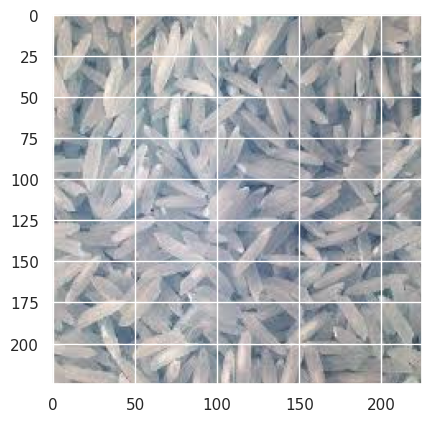

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(50,50))
test_input = test_img.reshape((1,50,50,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0., 0., 1., 0., 0.]], dtype=float32)